# MATH 210 Introduction to Mathematical Computing

## March 26, 2018

1. Example: Van der pol oscillator
2. Intro to pandas

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.integrate as spi
import pandas as pd
%matplotlib inline

## 1. Example: Van der pol oscillator

The Van der pol oscillator is a solution of the second order nonlinear differential equation

$$
y'' - \mu (1 - y^2) y' + y = 0
$$

Let's write a function called `van_der_pol` which takes input parameters `mu`, `y0`, `t_interval`. The function `van_der_pol` solves the eqution using `scipy.integrate.odeint` on the interval $[t_0,t_f]$ given by the list `t_interval` of length 2 and initial condition $y(t_0),y'(t_0)$ given by the list `y0` of length 2. The function plots the solution $y(t)$ over the interval and return a 2D Numpy array which $t$ values in the column at index 0 and y values in column at index 1.

In [2]:
def van_der_pol(mu,y0,t_interval):
    '''Solve and plot solution of the van der pol equation:
    
    y'' - \mu (1 - y^2) y' + y = 0
    
    Parameters
    ----------
    mu : parameter in the equation
    y0 : initial conditions [y(t_0),y'(t_0)]
    t_interval : interval of integration [t_0,t_f]
    
    Returns
    -------
    Plot the corresponding solution given by scipy.integrate.odeint 
    and return rn a 2D Numpy array with t values in the column at 
    index 0 and y values in column at index 1.
    '''
    def f(u,t):
        dudt = np.zeros(2)
        dudt[0] = u[1]
        dudt[1] = mu*(1 - u[0]**2) * u[1] - u[0]
        return dudt
    
    t0 = t_interval[0]
    tf = t_interval[1]
    t = np.linspace(t0,tf,int((tf - t0)*25))
    U = spi.odeint(f,y0,t)
    result = np.column_stack([t,U[:,0]])
    return result

In [3]:
solution = van_der_pol(2,[0,1],[0,20])

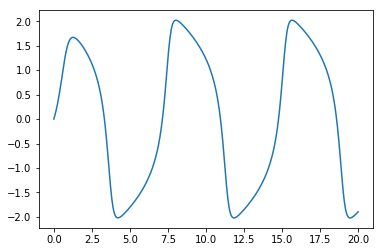

In [4]:
plt.plot(solution[:,0],solution[:,1])

## 2. Intro to pandas

[pandas](http://pandas.pydata) is the main Python package for data analysis. The main object in pandas is the DataFrame which is like a spreadsheet with column headers, row index and values.

Let's find some data and try to import it as a panda DataFrame using `pandas.read_csv`.

In [15]:
data = pd.read_csv('govt31a-eng.csv',skiprows = (0,1,2,4,25,26),index_col=0)

In [16]:
data.head()

,2005,2006,2007,2008,2009,Unnamed: 6
Total revenue,"29,484,455","31,296,336","33,442,589","36,219,454","37,441,581",NaN
Own source revenue,"13,336,261","14,074,771","14,891,573","16,244,024","16,779,804",NaN
Sales of goods and services,"10,520,144","10,958,828","11,473,607","12,429,235","12,897,731",NaN
Tuition fees,"6,152,681","6,416,268","6,784,499","7,405,380","7,681,008",NaN
Other sales of goods and services,"4,367,463","4,542,559","4,689,108","5,023,855","5,216,723",NaN


In [17]:
data.tail()

,2005,2006,2007,2008,2009,Unnamed: 6
Education,"14,250,885","14,947,966","15,780,869","17,007,798","17,691,098",NaN
Support to students,"1,031,730","1,100,234","1,191,590","1,335,982","1,359,762",NaN
Other postsecondary education expenses,"8,038,995","8,371,513","8,476,235","8,938,284","9,363,476",NaN
Debt charges,"606,483","643,871","650,094","709,514","740,786",NaN
Surplus or deficit,"-125,158","240,808","425,927","532,978","474,872",NaN


In [18]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20 entries, Total revenue to Surplus or deficit
Data columns (total 6 columns):
2005          20 non-null object
2006          20 non-null object
2007          20 non-null object
2008          20 non-null object
2009          20 non-null object
Unnamed: 6    0 non-null float64
dtypes: float64(1), object(5)
memory usage: 1.1+ KB
